<a href="https://colab.research.google.com/github/Fullkopi/Sharing/blob/main/Q12_ML1_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

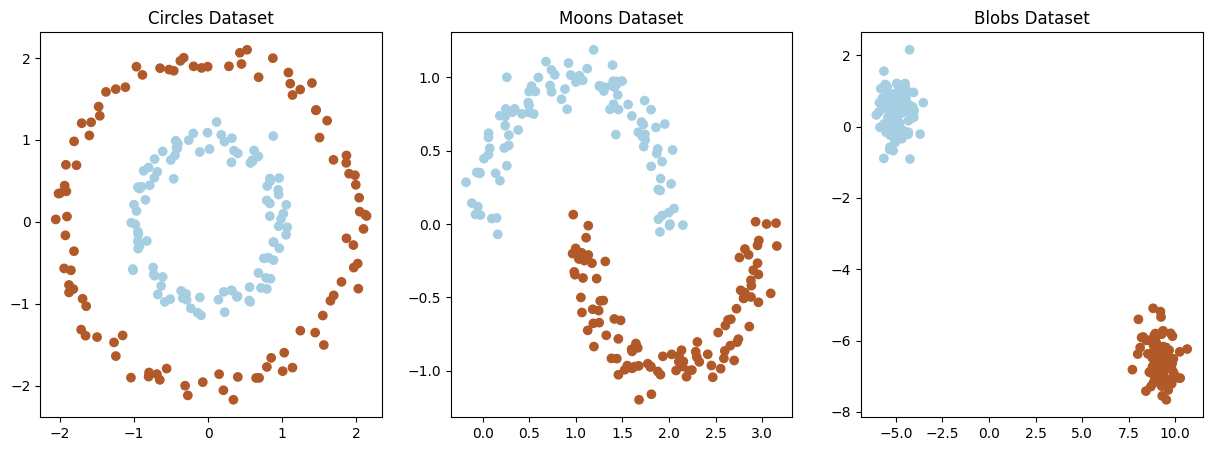

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate circles dataset
def generate_circles(n_samples=100, noise=0.1):
    theta = np.linspace(0, 2*np.pi, n_samples)
    x_inner = np.cos(theta) + np.random.normal(0, noise, size=n_samples)
    y_inner = np.sin(theta) + np.random.normal(0, noise, size=n_samples)

    x_outer = 2 * np.cos(theta) + np.random.normal(0, noise, size=n_samples)
    y_outer = 2 * np.sin(theta) + np.random.normal(0, noise, size=n_samples)

    X = np.vstack((np.hstack((x_inner, x_outer)), np.hstack((y_inner, y_outer)))).T
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    return X, y

# Generate moons dataset
def generate_moons(n_samples=100, noise=0.1):
    theta = np.linspace(0, np.pi, n_samples)
    x_inner = 1 - np.cos(theta) + np.random.normal(0, noise, size=n_samples)
    y_inner = np.sin(theta) + np.random.normal(0, noise, size=n_samples)

    x_outer = 2 + np.cos(theta) + np.random.normal(0, noise, size=n_samples)
    y_outer = -np.sin(theta) + np.random.normal(0, noise, size=n_samples)

    X = np.vstack((np.hstack((x_inner, x_outer)), np.hstack((y_inner, y_outer)))).T
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    return X, y

# Generate blobs dataset
def generate_blobs(n_samples=100, centers=2, cluster_std=0.5):
    X, y = np.zeros((0, 2)), np.zeros(0, dtype=int)
    for _ in range(centers):
        center_x, center_y = np.random.uniform(-10, 10), np.random.uniform(-10, 10)
        cluster_X = np.random.normal(loc=[center_x, center_y], scale=cluster_std, size=(n_samples, 2))
        X = np.vstack((X, cluster_X))
        y = np.hstack((y, np.full(n_samples, fill_value=_)))
    return X, y

# Example usage
circles_X, circles_y = generate_circles()
moons_X, moons_y = generate_moons()
blobs_X, blobs_y = generate_blobs()

# Plot the datasets
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
plt.title('Circles Dataset')

plt.subplot(1, 3, 2)
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, cmap=plt.cm.Paired)
plt.title('Moons Dataset')

plt.subplot(1, 3, 3)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=blobs_y, cmap=plt.cm.Paired)
plt.title('Blobs Dataset')

plt.show()


In [2]:
#Similarity Matrix calculation

def calculate_similarity_matrix(X, sigma=1.0):
    n_samples = X.shape[0]
    similarity_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            similarity_matrix[i, j] = np.exp(-np.linalg.norm(X[i] - X[j])**2 / (2 * sigma**2))
    return similarity_matrix

In [3]:
#Normalized Laplacian Matrix Calculation

def compute_normalized_laplacian(similarity_matrix):
    degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
    laplacian_matrix = degree_matrix - similarity_matrix
    degree_matrix_sqrt_inv = np.diag(1.0 / np.sqrt(np.sum(similarity_matrix, axis=1)))
    normalized_laplacian = np.dot(np.dot(degree_matrix_sqrt_inv, laplacian_matrix), degree_matrix_sqrt_inv)
    return normalized_laplacian

In [4]:
#Eigenvalue Decomposition

def eigen_decomposition(normalized_laplacian, num_eigenvectors):
    eigenvalues, eigenvectors = np.linalg.eigh(normalized_laplacian)
    sorted_indices = np.argsort(eigenvalues)
    sorted_indices = sorted_indices[:num_eigenvectors]
    eigenvectors = eigenvectors[:, sorted_indices]
    return eigenvalues[sorted_indices], eigenvectors

In [5]:
#K-means Clustering

from sklearn.cluster import KMeans

def kmeans_clustering(eigenvectors, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(eigenvectors)
    return clusters

In [6]:
#Spectral Clustering Algorithm

def spectral_clustering(X, n_clusters, sigma=1.0, num_eigenvectors=None):
    # Step 1: Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(X, sigma)

    # Step 2: Compute normalized Laplacian matrix
    normalized_laplacian = compute_normalized_laplacian(similarity_matrix)

    # Step 3: Eigenvalue decomposition
    eigenvalues, eigenvectors = eigen_decomposition(normalized_laplacian, num_eigenvectors)

    # Step 4: K-Means clustering
    clusters = kmeans_clustering(eigenvectors, n_clusters)

    return clusters

In [7]:
#Evaluation Metrics

from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

def evaluate_clustering(X, clusters):
    silhouette = silhouette_score(X, clusters)
    davies_bouldin = davies_bouldin_score(X, clusters)
    return silhouette, davies_bouldin

def evaluate_clustering_with_ground_truth(X, clusters, ground_truth):
    adjusted_rand = adjusted_rand_score(ground_truth, clusters)
    return adjusted_rand

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


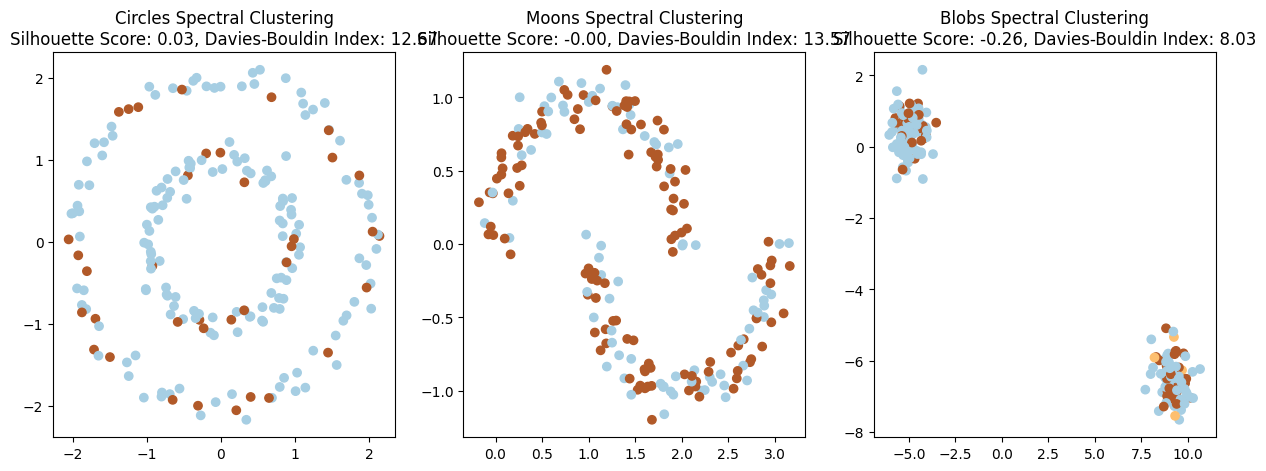

In [8]:
#Applying Spectral Clustering to the synthetic dataset

# Step 1: Apply Spectral Clustering to the datasets
circles_clusters = spectral_clustering(circles_X, n_clusters=2)
moons_clusters = spectral_clustering(moons_X, n_clusters=2)
blobs_clusters = spectral_clustering(blobs_X, n_clusters=3)

# Step 2: Evaluate clustering results
circles_silhouette, circles_davies_bouldin = evaluate_clustering(circles_X, circles_clusters)
moons_silhouette, moons_davies_bouldin = evaluate_clustering(moons_X, moons_clusters)
blobs_silhouette, blobs_davies_bouldin = evaluate_clustering(blobs_X, blobs_clusters)

# Step 3: Visualize clustering results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_clusters, cmap=plt.cm.Paired)
plt.title(f'Circles Spectral Clustering\nSilhouette Score: {circles_silhouette:.2f}, Davies-Bouldin Index: {circles_davies_bouldin:.2f}')

plt.subplot(1, 3, 2)
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_clusters, cmap=plt.cm.Paired)
plt.title(f'Moons Spectral Clustering\nSilhouette Score: {moons_silhouette:.2f}, Davies-Bouldin Index: {moons_davies_bouldin:.2f}')

plt.subplot(1, 3, 3)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=blobs_clusters, cmap=plt.cm.Paired)
plt.title(f'Blobs Spectral Clustering\nSilhouette Score: {blobs_silhouette:.2f}, Davies-Bouldin Index: {blobs_davies_bouldin:.2f}')

plt.show()

#README#

# Spectral Clustering Implementation

## Overview

Spectral Clustering is a powerful technique for clustering data points based on the affinity (similarity) between them. It works by transforming the data into a low-dimensional space using the eigenvectors of a similarity matrix, followed by a standard clustering algorithm in that space, typically K-Means.

This repository contains a Python implementation of the Spectral Clustering algorithm from scratch, along with functions to generate synthetic datasets and evaluate clustering performance.

## Spectral Clustering Algorithm

1. **Data Preprocessing**:
   - Generate or obtain the dataset with $(n)$ data points $(x_1, x_2, \ldots, x_n)$.

2. **Similarity Matrix Construction**:
   - Calculate the similarity between each pair of data points and construct a similarity matrix $(W)$. Common similarity measures include Gaussian kernel or k-nearest neighbors.

3. **Graph Laplacian Computation**:
   - Compute the unnormalized graph Laplacian matrix $(L = D - W)$, where $(D)$ is the degree matrix.

4. **Normalized Laplacian Matrix**:
   - Compute the normalized graph Laplacian matrix $(L_{\text{norm}} = D^{-1/2}LD^{-1/2})$, where $(D^{-1/2})$ is the inverse square root of the diagonal matrix $(D)$.

5. **Eigenvalue Decomposition**:
   - Perform eigenvalue decomposition on the normalized Laplacian matrix $(L_{\text{norm}})$ to obtain the $(k)$ smallest eigenvectors $(v_1, v_2, \ldots, v_k)$.

6. **Dimensionality Reduction**:
   - Form a matrix $(V)$ by stacking the $(k)$ eigenvectors horizontally.

7. **Clustering**:
   - Apply a clustering algorithm (e.g., K-Means) to the rows of $(V)$ to partition the data into $(k)$ clusters.

## Usage

To use the Spectral Clustering implementation:


1. Open the Jupyter Notebook file `Q12_ML1_Assignment4.ipynb` using the google colab link.


2. Follow the instructions in the notebook to execute the code cells and apply Spectral Clustering to the data.